In [1]:
import numpy as np
import pandas as pd

In [2]:
boston = np.genfromtxt("boston_train_gradient.csv", delimiter = ",")
boston_test = np.genfromtxt("boston_test_gradient.csv", delimiter = ",")

In [3]:
df = pd.DataFrame(boston)


In [11]:
boston_test.shape

(127, 13)

In [22]:
X = boston[:,0:13]
Y = boston[:, 13].reshape(-1,1)


features added

In [5]:
temp_col = X.shape[1]
temp_df = pd.DataFrame(X)
for i in range(temp_col):
    temp_df[temp_col + i] = temp_df[i] ** 2

extended_x = temp_df.values



# test

temp_col_test = boston_test.shape[1]
temp_df_test = pd.DataFrame(boston_test)
for i in range(temp_col_test):
    temp_df_test[temp_col_test + i] = temp_df_test[i] ** 2
extended_test = temp_df_test.values


In [23]:
from sklearn import preprocessing

In [24]:
scaler = preprocessing.StandardScaler()

# adding column of 1 at the end

In [26]:
last_col = X.shape[1]
no_rows = Y.shape[0]
no_rows_test = boston_test.shape[0]


In [27]:
add_c = np.ones((no_rows,1))
add_c_test = np.ones((no_rows_test,1)) 

de added

In [29]:
d = np.concatenate((X,add_c), axis = 1)
test_sir = np.concatenate((boston_test,add_c_test), axis = 1)
de = np.concatenate((extended_x,add_c), axis = 1)
test_sir_extended = np.concatenate((extended_test,add_c_test), axis = 1)


de.shape
d.shape

(379, 14)

# scaling

In [25]:
scaler.fit(X)
X = scaler.transform(X)

In [10]:
scaler.fit(d)
d = scaler.transform(d)


In [ ]:
scaler.fit()

In [194]:
#scaler.fit(Y)
#Y = scaler.transform(Y)


In [11]:
scaler.fit(test_sir)
test_sir = scaler.transform(test_sir)

# algo

In [13]:
def step_gradient(points, op, learning_rate, m):
    N = points.shape[1]
    m_slope = np.zeros(N)
    M = len(points)
   
    for i in range(M):
        x = points[i,:]
        y = op[i]
        for j in range(N):
            temp = (-2/M) * ((y - (m*x).sum())*x[j])
            m_slope[j] = temp + m_slope[j]
    new_m = m - learning_rate*m_slope
    
    #print(new_m, new_c)
    return new_m

In [14]:
def gd(points, op, learning_rate, num_iterations):
    N = points.shape[1]
    m = np.zeros(N)
    
    for i in range(num_iterations):
        m = step_gradient(points, op, learning_rate, m)
        #print(i, "cost: ", cost(points, m, c))
    return m



In [15]:
def run(s,l):
    
    
    learning_rate = 0.01
    num_iteration = 1000
    m = gd(s, l, learning_rate, num_iteration)
    #print(m)
    return m

# spliting

In [16]:
from sklearn import model_selection

In [30]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(d, Y)

# main

In [31]:
final_m = run(x_train, y_train)


#final_m = run(de, Y)
final_m

array([-1.00606388,  0.59489785, -0.1991178 ,  1.12849382, -1.80237043,
        2.75854048,  0.11622315, -2.71749964,  1.88824915, -0.80664872,
       -2.03129311,  0.60655058, -3.99142402, 22.74214473])

# predicting values for test

In [32]:
list1 = list()
for i in range(len(x_test)):
    x = x_test[i,:]
    y_pred = (final_m*x).sum()
    list1.append(y_pred)
list2 = np.array(list1)

# predicting on final_test.csv without extended features


In [52]:
list_test = list()
for i in range(len(test_sir)):
    x = test_sir[i,:]
    y_pred = (final_m*x).sum()
    list_test.append(y_pred)
list_final = np.array(list_test)

# predicting on final_test.csv with extended features

In [16]:
list_test = list()
for i in range(len(test_sir_extended)):
    x = test_sir_extended[i,:]
    y_pred = (final_m*x).sum()
    list_test.append(y_pred)
list_final = np.array(list_test)

In [20]:
import matplotlib.pyplot as plt

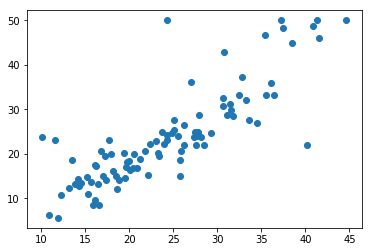

In [33]:
#kl = kl.reshape(379)

plt.scatter(list2,y_test)
plt.show()

In [17]:
list_final.shape

(127,)

In [20]:
np.savetxt("boston_gradientdescent_project_predicted_values4.csv", list_final, delimiter = ",", fmt = '%.5f')